<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter04/Image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing data augmentation
In the previous scenario, we learned about how CNNs help in predicting the class of an image when it is translated. While this worked well for translations of up to 5 pixels, anything beyond that is likely to have a very low probability for the right class. In this section, we'll learn how to ensure that we predict the right class, even if the image is translated by a considerable amount.  

To address this challenge, we'll train the neural network by translating the input images by 10 pixels randomly (both toward the left and the right) and passing them to the network. This way, the same image will be processed as a different image in different passes since it will have had a different amount of translation in each pass.  

Before we leverage augmentations to improve the accuracy of our model when images are translated, let's learn about the various augmentations that can be done on top of an image.

# image augmentations
So far, we have learned about the issues image translation can have on a model's prediction accuracy. However, in the real world, we might encounter various scenarios, such as the following:

- Images are rotated slightly 
- Images are zoomed in/out (scaled) 
- Some amount of noise is present in the image 
- Images have low brightness 
- Images have been flipped 
- Images have been sheared (one side of the image is more twisted)

A neural network that does not take the preceding scenarios into consideration won't provide accurate results, just like in the previous section, where we had a neural network that had not been explicitly trained on images that had been heavily translated.  



The `augmenters` class in the `imgaug` package has useful utilities for performing these augmentations. Let's take a look at the various utilities present in the `augmenters` class for generating augmented images from a given image. Some of the most prominent augmentation techniques are as follows:

- Affine transformations 
- Change brightness 
- Add noise



**NOTE**
PyTorch has a handy image augmentation pipeline in the form of `torchvision.transforms`. However, we still opted to introduce a different library primarily because of the larger variety of options imgaug contains, as well as due to the ease of explaining augmentations to a new user. You are encouraged to research the torchvision transforms as an exercise and recreate all the functions that are presented to strengthen your understanding.

In [1]:
# %%capture
# !pip install -U imgaug

In [1]:
# import imgaug
# print(imgaug.__version__)

ModuleNotFoundError: No module named 'imgaug'

In [5]:
# import imgaug.augmenters as iaa
import torchvision.transforms.functional as pttf
from torchvision import transforms as T


In [2]:
from torchvision import datasets
import torch
data_folder = '~/datasets/FMNIST' # This can be any directory you want
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [3]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def to_numpy(tensor):
    return tensor.cpu().detach().numpy()

Text(0.5, 1.0, 'Original image')

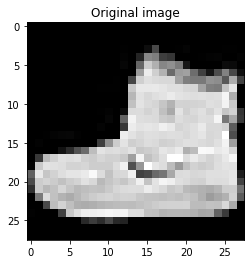

In [5]:
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')

### Affine 

Text(0.5, 1.0, 'Scaled image')

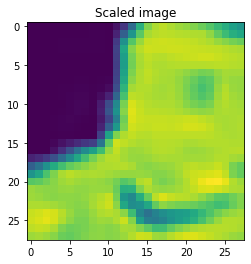

In [8]:
aug = iaa.Affine(scale=2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Scaled image')

Text(0.5, 1.0, 'Scaled image')

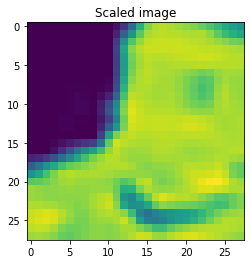

In [7]:
# this is how its done with torchvision.transforms :
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[0,0],scale=2,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img)
plt.title('Scaled image')

Text(0.5, 1.0, 'Translated image by 10 pixels (right and bottom)')

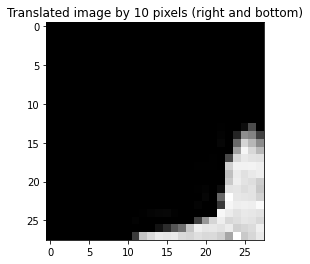

In [9]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translated image by 10 pixels (right and bottom)')

Text(0.5, 1.0, 'Scaled image')

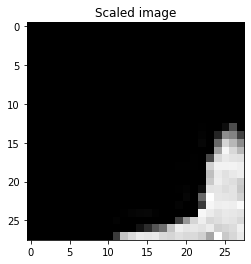

In [10]:
# this is how its done with torchvision.transforms :
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[10,10],scale=1,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')
plt.title('Scaled image')

Text(0.5, 1.0, 'Translation of 10 pixels \nacross columns and 2 pixels over rows')

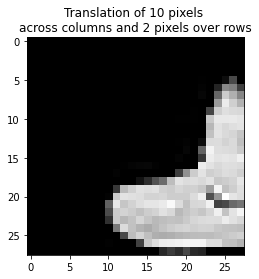

In [10]:
aug = iaa.Affine(translate_px={'x':10,'y':2})
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels \nacross columns and 2 pixels over rows')

Text(0.5, 1.0, 'Scaled image')

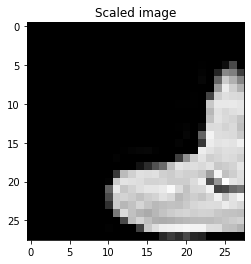

In [11]:
# this is how its done with torchvision.transforms :
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[10,2],scale=1,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')
plt.title('Scaled image')

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

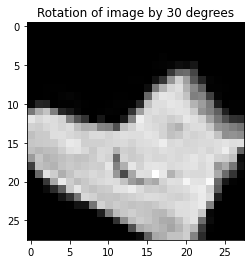

In [11]:
aug = iaa.Affine(rotate=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees')

Text(0.5, 1.0, 'Scaled image')

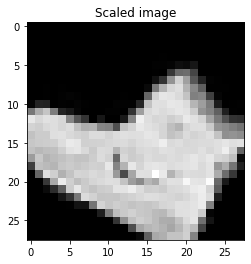

In [12]:
# this is how its done with torchvision.transforms :
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=30,translate=[0,0],scale=1,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')
plt.title('Scaled image')

Text(0.5, 1.0, 'Rotation of image by -30 degrees')

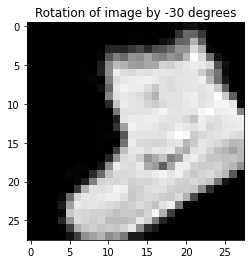

In [12]:
aug = iaa.Affine(rotate=-30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by -30 degrees')

Text(0.5, 1.0, 'Shear of image by 30 degrees')

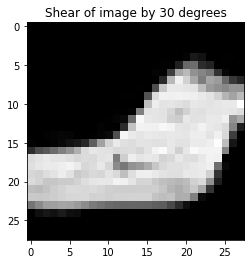

In [13]:
aug = iaa.Affine(shear=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image by 30 degrees')

Text(0.5, 1.0, 'Scaled image')

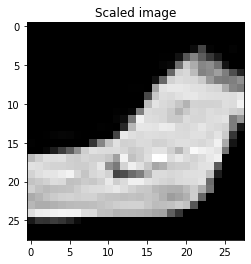

In [13]:
# this is how its done with torchvision.transforms :
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[0,0],scale=1,shear=30,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')
plt.title('Scaled image')

Text(0.5, 1.0, 'Shear of image by -30 degrees')

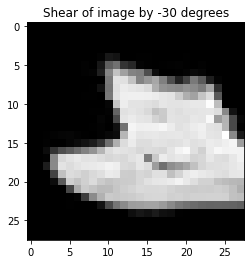

In [14]:
aug = iaa.Affine(shear=-30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image by -30 degrees')

Text(0.5, 1.0, 'Scaled image')

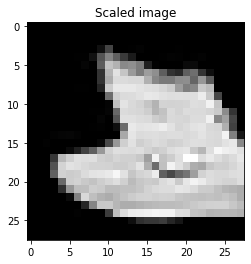

In [14]:
# this is how its done with torchvision.transforms :
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[0,0],scale=1,shear=-30,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')
plt.title('Scaled image')

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

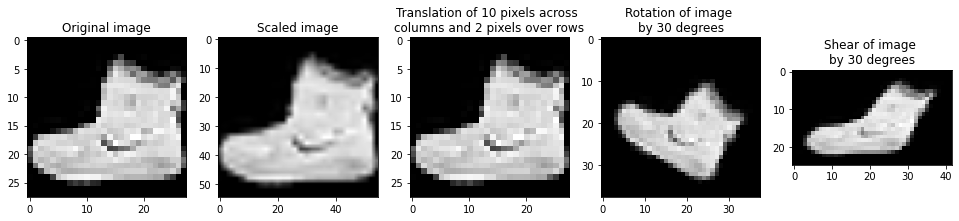

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image \nby 30 degrees')

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

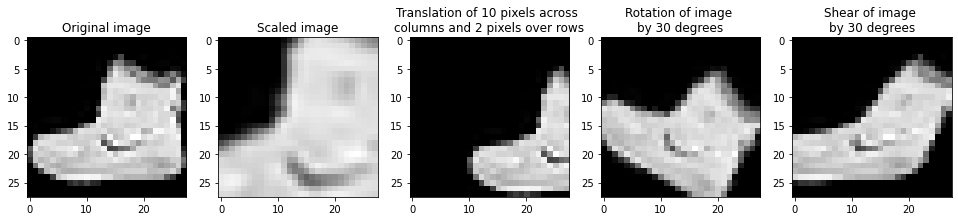

In [15]:
plt.figure(figsize=(20,20))

plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')

plt.subplot(162)
# aug = iaa.Affine(scale=2, fit_output=True)
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[0,0],scale=2,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img,cmap='gray')
plt.title('Scaled image')

plt.subplot(163)
# aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[10,2],scale=1,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')

plt.subplot(164)
# aug = iaa.Affine(rotate=30, fit_output=True)
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=30,translate=[0,0],scale=1,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')
plt.title('Rotation of image \nby 30 degrees')

plt.subplot(165)
# aug = iaa.Affine(shear=30, fit_output=True)
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=0,translate=[0,0],scale=1,shear=30,interpolation=pttf.InterpolationMode.BILINEAR)
plt.imshow(aug_img, cmap='gray')

plt.title('Shear of image \nby 30 degrees')

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

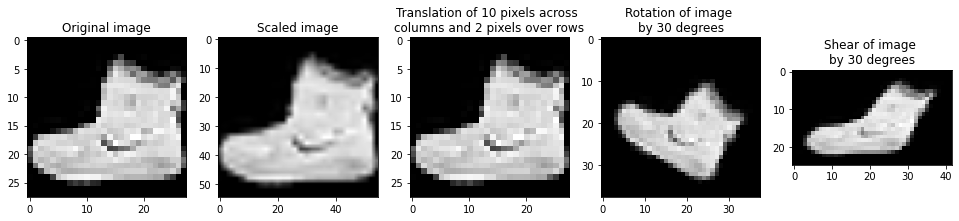

In [16]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0], cmap='gray')
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True, cval = 255)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Shear of image \nby 30 degrees')

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

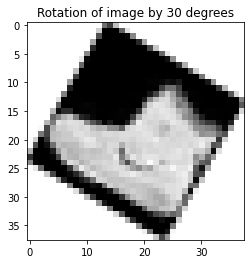

In [17]:
aug = iaa.Affine(rotate=30, fit_output=True, cval=255)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees')

Text(0.5, 1.0, 'Scaled image')

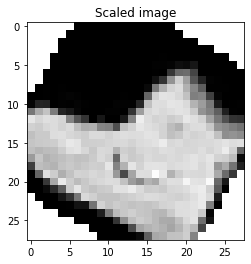

In [16]:
aug_img=pttf.affine(pttf.to_pil_image(tr_images[0]),angle=30,translate=[0,0],scale=1,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR,fill=255)
plt.imshow(aug_img, cmap='gray')
plt.title('Scaled image')

Text(0.5, 1.0, 'Rotation of image by \n30 degrees with wrap mode')

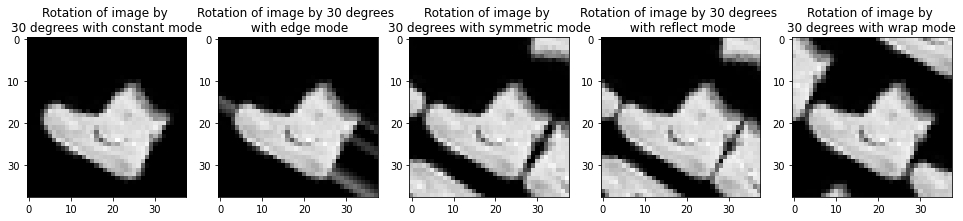

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(161)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with constant mode')
plt.subplot(162)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='edge')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with edge mode')
plt.subplot(163)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='symmetric')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with symmetric mode')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='reflect')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with reflect mode')
plt.subplot(165)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='wrap')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with wrap mode')

To replace the functionality provided by `aug` in the above cell, we'll need to compose transformations:

In [11]:
class MyAffineTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angle,translate,scale,shear,interpolation=pttf.InterpolationMode.BILINEAR):
        self.angle = angle
        # angle=0,translate=[0,0],scale=2,shear=0.0,interpolation=pttf.InterpolationMode.BILINEAR
        self.translate = translate
        self.scale = scale
        self.shear = shear
        self.interpolation = interpolation


    def __call__(self, x):
        return pttf.affine(x,self.angle,self.translate,self.scale,self.shear,self.interpolation)


Text(0.5, 1.0, 'Rotation of image by \n30 degrees with wrap mode')

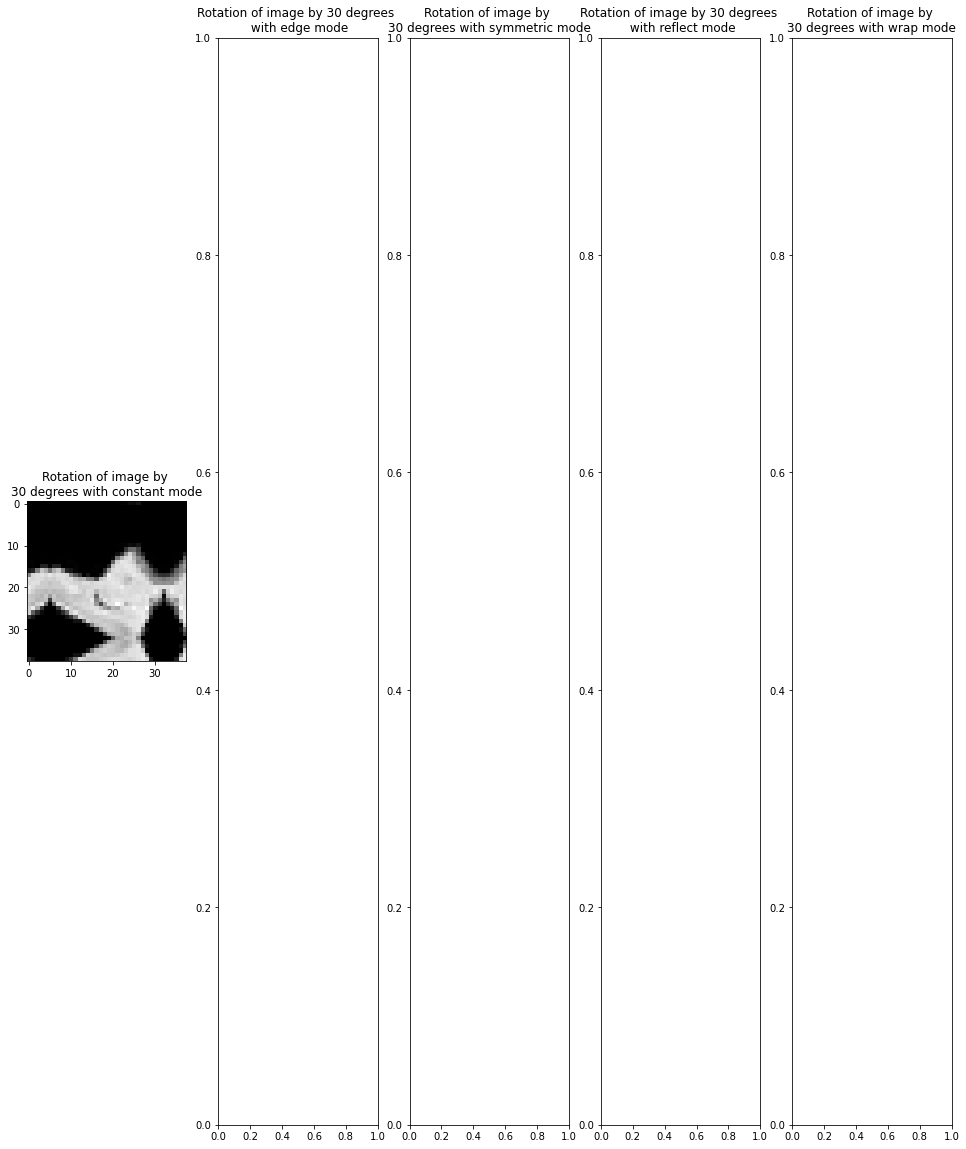

In [18]:
plt.figure(figsize=(20,20))

plt.subplot(161)
# aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='constant')
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
ptt_img = T.Compose([T.ToPILImage(),MyAffineTransform(30,[0,0],1,0),T.Pad(5,padding_mode='reflect')])
aug_img=ptt_img(tr_images[0])
plt.imshow(aug_img, cmap='gray')
plt.title('Rotation of image by \n30 degrees with constant mode')

plt.subplot(162)
# aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='edge')
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with edge mode')

plt.subplot(163)
# aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='symmetric')
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with symmetric mode')

plt.subplot(164)
# aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='reflect')
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by 30 degrees \n with reflect mode')

plt.subplot(165)
# aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='wrap')
# plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by \n30 degrees with wrap mode')

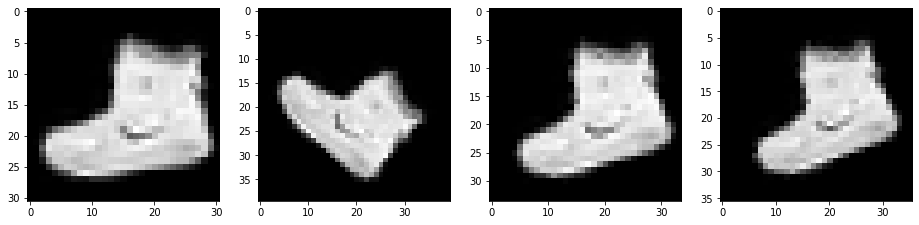

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(151)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.subplot(152)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.subplot(153)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.subplot(154)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')

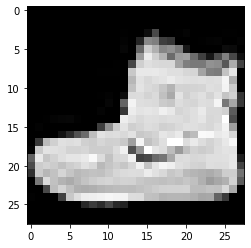

In [20]:
aug = iaa.Multiply(1)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

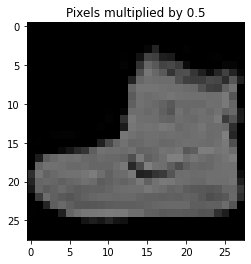

In [21]:
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Pixels multiplied by 0.5')

Text(0.5, 1.0, 'Pixel contrast by 0.5')

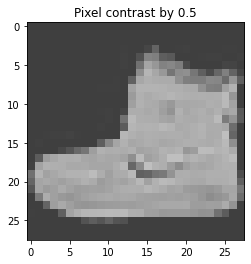

In [22]:
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Pixel contrast by 0.5')

Text(0.5, 1.0, 'Random 20% pixel dropout')

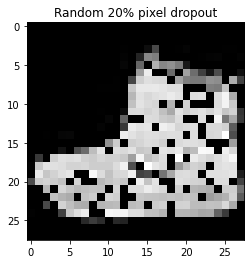

In [23]:
aug = iaa.Dropout(p=0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% pixel dropout')

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

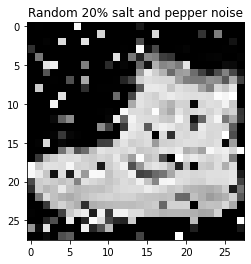

In [24]:
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise')

Text(0.5, 1.0, 'Random 20% salt and pepper noise')

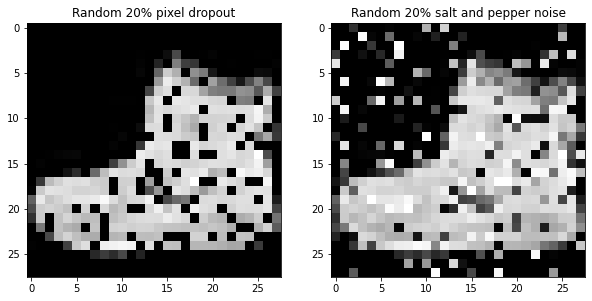

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(121)
aug = iaa.Dropout(p=0.2,)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% pixel dropout')
plt.subplot(122)
aug = iaa.SaltAndPepper(0.2,)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Random 20% salt and pepper noise')

In [26]:
seq = iaa.Sequential([
      iaa.Dropout(p=0.2,),
    iaa.Affine(rotate=(-30,30))], random_order= True)

Text(0.5, 1.0, 'Image augmented using a \nrandom orderof the two augmentations')

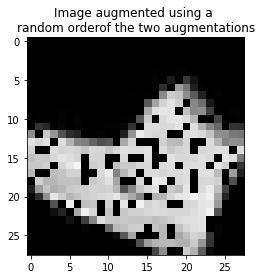

In [28]:
plt.imshow(seq.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Image augmented using a \nrandom orderof the two augmentations')

Text(0.5, 1.0, 'Gaussian blurring of image\n with a sigma of 1')

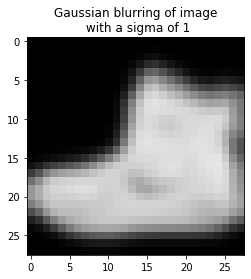

In [29]:
aug = iaa.GaussianBlur(sigma=1)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray',vmin = 0, vmax = 255)
plt.title('Gaussian blurring of image\n with a sigma of 1')